In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import os
import seaborn as sns

In [4]:
import boto3
import pandas as pd
from io import BytesIO

s3 = boto3.client('s3')
bucket_name = 'ccd-final-project'

credit_record_key = 'credit_record.csv'
application_record_key = 'application_record.csv'

# Function to load a CSV file from S3
def load_csv_from_s3(bucket, key):
    response = s3.get_object(Bucket=bucket, Key=key)
    content = response['Body']
    return pd.read_csv(BytesIO(content.read()))

# Load your dataframes
credit_record = load_csv_from_s3(bucket_name, credit_record_key)
application_record = load_csv_from_s3(bucket_name, application_record_key)

# **Data Exploration**

In [5]:
print(credit_record.shape, application_record.shape)

(1048575, 3) (438557, 18)


This means the credit record dataset has 1048575 rows and 3 columns while the application record dataset has 438557 rows and 18 columns

In [6]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


There are 1048575 non null rows in the dataset which means that there are no missing values in the dataset. The numerical variables in the dataset are ID and MONTHS_BALANCE while STATUS is the only categorical variable. 

In [8]:
credit_record['MONTHS_BALANCE'].value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

This means there are more records for recent months compared to previous months. This is especially true for one month ago as indicated by -1, followed by two months ago, as indicated by -2 and so on

In [9]:
credit_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

C has the highest value count, indicating that most clents paid off their credit cards at the month indicated on their month's balance. 
0 indicates that 383120 clients paid off their credit cards 1-29 days past due. 
X indicates that 209230 clients took no loans that month. 
1 indicates that 11090 clients paid off their credit cards 30-59 days past due. 
5 indicates that 1693 clients had overdue debts for more than 150 days. 
2 indicates that 868 clients paid off their credit cards 60-89 days past due. 
3 indicates that 320 clients paid off their credit cards 90-119 days past due. 
4 indicates that 223 clients paid off their credit cards 120-149 days past due. 

In [10]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [11]:
#To check the unique values under each column except the amt_income_total column
for column in application_record.columns:
    if column != 'AMT_INCOME_TOTAL':
        print(pd.unique(application_record[column]))

[5008804 5008805 5008806 ... 6841878 6842765 6842885]
['M' 'F']
['Y' 'N']
['Y' 'N']
[ 0  1  3  2  4  5 14 19  7  9 12  6]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
[-12005 -21474 -19110 ...  -8169  -9738 -22257]
[-4542 -1134 -3051 ... -8300 -9020 -4884]
[1]
[1 0]
[0 1]
[0 1]
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']
[ 2.  1.  5.  3.  4.  6. 15.  7. 20.  9. 11. 14.  8.]


In [12]:
application_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

From the information above, the following columns contain numerical variables but they actually contain categorical variables (i.e. they have letters or words instead of numbers): CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE. The categorical variables will be converted to numerical in the data preprocessing stage.

Furthurmore, the DAYS_BIRTH and DAYS_EMPLOYED columns are unnecessary for prediction and will be removed later

In [13]:
# Check for missing values
application_record.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

Occupation type is the only column in the dataset that has missing values, with 134203 missing values

# **Data Preprocessing**

In [14]:
# Convert categorical to numerical variables using label encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]
for objColumn in columns:
    label = LabelEncoder()
    application_record[objColumn] = label.fit_transform(application_record[objColumn].values)

In [15]:
# Confirm that categorical variables have been converted to numerical
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,Sales staff,1.0


In [16]:
# Convert categorical variables in the occupation type column to numerical using a custom numbering format
Ocupation_dict = {'Security staff':0, 'Sales staff':1, 
                  'Accountants':2, 'Laborers':3, 
                  'Managers':4,'Drivers':5, 
                  'Core staff':6, 'High skill tech staff':7, 
                  'Cleaning staff':8,'Private service staff':9,
                  'Cooking staff':10, 'Low-skill Laborers':11,
                  'Medicine staff':12, 'Secretaries':13,
                  'Waiters/barmen staff':14, 'HR staff':15,
                  'Realty agents':16, "IT staff":17}

application_record['OCCUPATION_TYPE'] = application_record['OCCUPATION_TYPE'].map(Ocupation_dict)

In [17]:
# Confirm that the values in occupation type column have been changed
print(application_record['OCCUPATION_TYPE'])

0         NaN
1         NaN
2         0.0
3         1.0
4         1.0
         ... 
438552    NaN
438553    3.0
438554    1.0
438555    NaN
438556    1.0
Name: OCCUPATION_TYPE, Length: 438557, dtype: float64


In [18]:
# Drop unnessessary columns
application_record.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], inplace=True, axis=1)

In [19]:
# Confirm that columns have been dropped
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,0.0,2.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,1.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,1.0,1.0


In [20]:
# Convert categorical to numerical variables and map to either 0 or 1 because it is a binary classification task
# 1 includes users who took no loans that month paid within the month or 30 days past the due date while 
# 0 includes users who pay within 30 to 149 days past the due date or have overdue debts for more than 150 days
map_status = {'C' : 1,
              'X' : 1,
              '0' : 1,
              '1' : 0,
              '2' : 0,
              '3' : 0,
              '4' : 0,
              '5' : 0}
credit_record["STATUS"] = credit_record['STATUS'].map(map_status)

In [21]:
# Confirm the above
credit_record['STATUS'].value_counts()

1    1034381
0      14194
Name: STATUS, dtype: int64

In [22]:
# Merge both credit and applications records to create a comprehensive dataset
df_credit = application_record.merge(credit_record, how='inner', on=['ID'])
df_credit.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,0,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-2,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-3,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,NaN,2.0,-4,1


# **Develop the Models**

In [23]:
# Train test split
from sklearn.model_selection import train_test_split

target = df_credit['STATUS']
features = df_credit.drop(['STATUS'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75)

In [24]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('lr', LogisticRegression())
])

In [40]:
grid_param = {
    'lr__solver': ['liblinear'],
    'lr__C': np.logspace(-4, 4, 20),
    'lr__penalty': ["l1", "l2"]
}

grid_search = GridSearchCV(pipeline, param_grid=grid_param, n_jobs=-1, cv=4, return_train_score=True, scoring='roc_auc')
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='most_frequent')),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'lr__penalty': ['l1', 'l2'],
                         'lr__solver': ['liblinear']},
             return_train_score=True, scoring='roc_auc')

In [41]:
grid_search.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('lr',
                 LogisticRegression(C=0.23357214690901212, penalty='l1',
                                    solver='liblinear'))])

In [42]:
# Random Forest
pipelineForest = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('forest', RandomForestClassifier())
])

In [43]:
# Replace missing values in x train with most common value in each column to remove missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
X_train = imputer.transform(X_train)

In [44]:
# Replace missing values in x test with most common value in each column as done with x train. This is to ensure consistency
imputer.fit(X_test)
X_test = imputer.transform(X_test)

In [45]:
# Model Development and Training
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

0.9999879990262067

0.9999897134510343 is the mean acccuracy of the model on the training data. The accuracy is usually between 0 and 1 where 0 is no accuracy and 1 is perfect accuracy. Therefore, the model correctly classified most of the training data. 

In [46]:
# Gradient Boosting
# Model Development and Training
boost = GradientBoostingClassifier(n_estimators=200, max_depth=10)
boost.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=200)

# **Evaluation**

The models are evaluateed on ROC AUC (Receiver Operating Characteristic Area Under the Curve), which is a performance metric that is used to evaluate the model's ability to distinguish between the positive and negative classes in binary classification tasks.
The ROC AUC score ranges from 0 to 1, where 0 is poor prediction and 1 is perfect prediction. 

In [47]:
# Logistic Regression
from sklearn.metrics import roc_auc_score, precision_recall_curve, ConfusionMatrixDisplay, confusion_matrix

prediction = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, prediction)

0.5730823932057098

An ROC AUC score of 0.57 means the model is moderately accurate at prediction

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


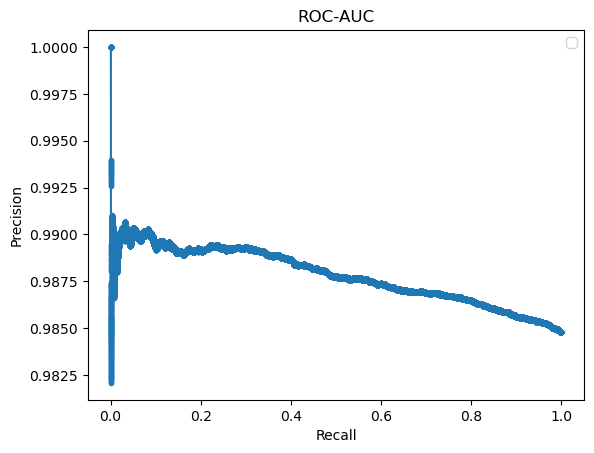

In [48]:
# Precicion-Recall Curve for Logistic Regression
precision, recall, th = precision_recall_curve(y_test, prediction)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [52]:
# Random Forest 
predictionForest = forest.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionForest)

0.8549975972067136

An ROC AUC score of 0.85 means the classifier is has high accuracy of prediction

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


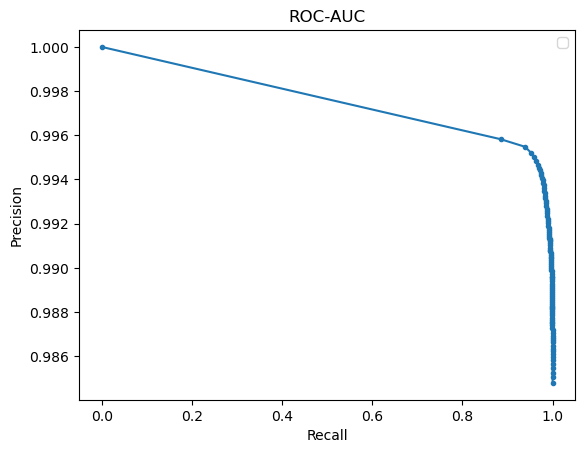

In [49]:
# Precicion-Recall Curve for Random Forest 
precision, recall, th = precision_recall_curve(y_test, predictionForest)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()

In [50]:
# Gradient Boosting
predictionBoost = boost.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, predictionBoost)

0.8725977383441935

An ROC AUC score of 0.87 means the classifier is has high accuracy of prediction. The gradient boosting classifer has the highest ROC AUC score of the classifiers used and therefore is the best performing.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


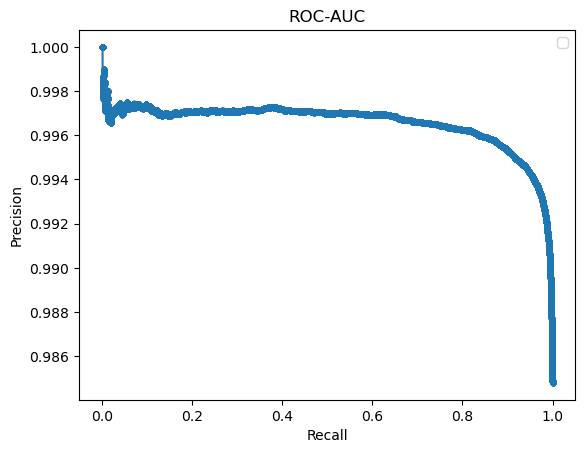

In [51]:
# Precicion-Recall Curve for Gradient Boosting
precision, recall, th = precision_recall_curve(y_test, predictionBoost)
plt.plot(recall, precision, marker='.')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC-AUC")
plt.legend()
plt.show()